In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# データの分割
from sklearn.model_selection import train_test_split

# データセット
from tensorflow.keras.datasets import fashion_mnist

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("x_train=", x_train.shape)
print("y_train=", y_train.shape)
print("x_test=", x_test.shape)
print("y_test=", y_test.shape)

x_train= (60000, 28, 28)
y_train= (60000,)
x_test= (10000, 28, 28)
y_test= (10000,)


In [4]:
images = {label: [] for label in range(0,10)}

In [5]:
image_count = 0

for i in range(0, len(x_train)):
    if len(images[y_train[i]]) < 10:
        images[y_train[i]].append(x_train[i])
        image_count += 1
        if image_count == 100:
            break

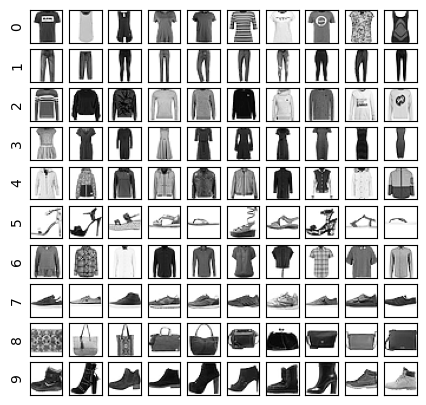

In [6]:
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

In [19]:
x_train2 = x_train.reshape(len(x_train), 28, 28, 1)

x_test2 = x_test.reshape(len(x_test), 28, 28, 1)


In [20]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
y_train2 = to_categorical(y_train)

# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
y_test2 = to_categorical(y_test)

In [21]:
print("x_train2=", x_train2.shape)
print("y_train2=", y_train2.shape)
print("x_test2=", x_test2.shape)
print("y_test2=", y_test2.shape)

x_train2= (60000, 28, 28, 1)
y_train2= (60000, 10)
x_test2= (10000, 28, 28, 1)
y_test2= (10000, 10)


In [23]:
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x_train2, y_train2, test_size=0.3, random_state=0)

In [25]:
# データ(学習、検証、テスト)の形状を確認
print("x_train2=", x_train2.shape, ", y_train2=", y_train2.shape)
print("x_valid2=", x_valid2.shape, ", y_valid2=", y_valid2.shape)
print("x_test2=", x_test2.shape, ", y_test2=", y_test2.shape)

x_train2= (42000, 28, 28, 1) , y_train2= (42000, 10)
x_valid2= (18000, 28, 28, 1) , y_valid2= (18000, 10)
x_test2= (10000, 28, 28, 1) , y_test2= (10000, 10)


In [26]:
# ライブラリのインポート
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

In [27]:
# モデルの初期化
model = keras.Sequential()

# ここにモデルを構築するコードを記述してください
model.add(Conv2D(16, kernel_size=3, padding="same",
                strides=1, input_shape=(28, 28, 1),
                activation="relu"))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
# 構築
model.compile(optimizer = "rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-01-13 13:17:56.398580: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-13 13:17:56.399954: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-13 13:17:56.402693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-3-167): /proc/driver/nvidia/version does not exist
2023-01-13 13:17:56.410745: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-13 13:17:56.523680: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2400020000 Hz
2023-01-13 13:17:56.530975: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2c080013e0 initialized for platform Host (this does not guarantee

In [28]:
# モデルの構造を表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                200720    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 201,050
Trainable params: 201,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time
# 学習を実施し、結果をlogで受け取る。EarlyStoppingを使用する
log = model.fit(x_train2, y_train2, epochs=20, batch_size=100, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta=0, patience=100,
                                                        verbose=1)],
        validation_data=(x_valid2, y_valid2))

2023-01-13 13:17:59.314189: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 32928000 exceeds 10% of free system memory.


Epoch 1/20
  5/420 [..............................] - ETA: 12s - loss: 18.4835 - accuracy: 0.1220

2023-01-13 13:18:00.372329: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.
2023-01-13 13:18:00.431907: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.
2023-01-13 13:18:00.468007: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.
2023-01-13 13:18:00.504431: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.


420/420 [==============================] - 16s 38ms/step - loss: 1.6853 - accuracy: 0.4731 - val_loss: 1.0224 - val_accuracy: 0.6372
Epoch 2/20
420/420 [==============================] - 16s 39ms/step - loss: 0.8642 - accuracy: 0.6947 - val_loss: 0.7942 - val_accuracy: 0.7081
Epoch 3/20
420/420 [==============================] - 16s 38ms/step - loss: 0.6672 - accuracy: 0.7531 - val_loss: 0.6528 - val_accuracy: 0.7602
Epoch 4/20
420/420 [==============================] - 16s 37ms/step - loss: 0.5365 - accuracy: 0.7980 - val_loss: 0.6179 - val_accuracy: 0.7789
Epoch 5/20
420/420 [==============================] - 16s 39ms/step - loss: 0.4709 - accuracy: 0.8152 - val_loss: 0.5348 - val_accuracy: 0.8098
Epoch 6/20
420/420 [==============================] - 16s 38ms/step - loss: 0.4135 - accuracy: 0.8417 - val_loss: 0.4891 - val_accuracy: 0.8299
Epoch 7/20
420/420 [==============================] - 16s 37ms/step - loss: 0.3392 - accuracy: 0.8722 - val_loss: 0.4591 - val_accuracy: 0.8641
Epo

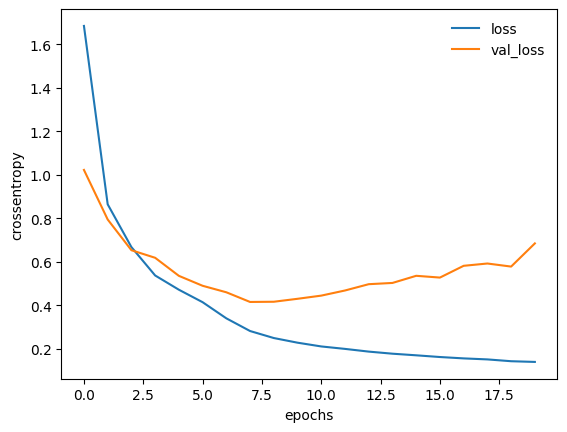

In [30]:
# 学習の課程をグラフで表示する
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [32]:
# 環境により、そのままX_test2を使うとエラーになる対策(float型に変換)
x_test2 = x_test2 * 1.0

In [33]:
# predictを使い、X_test2をもとに予測した結果をY_pred2に代入
y_pred2 = np.argmax(model.predict(x_test2), axis=1)

In [34]:
# カテゴリー変数Y_test2を復元してY_test2_に代入
y_test2_ = np.argmax(y_test2, axis=1)

In [35]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report

print(classification_report(y_test2_, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.91      0.82      0.86      1000
           4       0.71      0.90      0.79      1000
           5       0.97      0.95      0.96      1000
           6       0.72      0.61      0.66      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

